# Image Classification

The *Computer Vision* cognitive service provides useful pre-built models for working with images, but you'll often need to train your own model for computer vision. For example, suppose the Northwind Traders retail company wants to create an automated checkout system that identifies the grocery items customers want to buy based on an image taken by a camera at the checkout. To do this, you'll need to train a classification model that can classify the images to identify the item being purchased.

![A robot holding a clipboard, classifying pictures of an apple, a banana, and an orange](./images/image-classification.jpg)

In Azure, you can use the ***Custom Vision*** cognitive service to train an image classification model based on existing images. There are two elements to creating an image classification solution. First, you must train a model to recognize different classes using existing images. Then, when the model is trained you must publish it as a service that can be consumed by applications.

## Create a Custom Vision resource

To use the Custom Vision service, you need an Azure resource that you can use to *train* a model, and a resource with which you can *publish* it for applications to use. The resource for either (or both) tasks can be a general **Cognitive Services** resource, or a specific **Custom Vision** resource. You can use the same Cognitive Services resource for each of these tasks, or you can use different resources (in the same region) for each task to manage costs separately.

Use the following instructions to create a new **Custom Vision** resource.

1. In a new browser tab, open the Azure portal at [https://portal.azure.com](https://portal.azure.com), and sign in using the Microsoft account associated with your Azure subscription.
2. Select the **&#65291;Create a resource** button, search for *custom vision*, and create a **Custom Vision** resource with the following settings:
    - **Create options**: Both
    - **Subscription**: *Your Azure subscription*
    - **Resource group**: *Select or create a resource group with a unique name*
    - **Name**: *Enter a unique name*
    - **Training location**: *Choose any available region*
    - **Training pricing tier**: F0
    - **Prediction location**: *The same region as the training resource*
    - **Prediction pricing tier**: F0

    > **Note**: If you already have an F0 custom vision service in your subscription, select **S0** for this one.

3. Wait for the resources to be created, and note that two Custom Vision resources are provisioned; one for training, and another for prediction. You can view these by navigating to the resource group where you created them.

## Create a Custom Vision project

To train an object detection model, you need to create a Custom Vision project based on your training resource. To do this, you'll use the Custom Vision portal.

1. Download and extract the training images from https://aka.ms/fruit-images.
2. In another browser tab, open the Custom Vision portal at [https://customvision.ai](https://customvision.ai). If prompted, sign in using the Microsoft account associated with your Azure subscription and agree to the terms of service.
3. In the Custom Vision portal, create a new project with the following settings:
    - **Name**: Grocery Checkout
    - **Description**: Image classification for groceries
    - **Resource**: *The Custom Vision resource you created previously*
    - **Project Types**: Classification
    - **Classification Types**: Multiclass (single tag per image)
    - **Domains**: Food
4. Click **\[+\] Add images**, and select all of the files in the **apple** folder you extracted previously. Then upload the image files, specifying the tag *apple*, like this:

![Upload apple with apple tag](./images/upload_apples.jpg)
   
5. Repeat the previous step to upload the images in the **banana** folder with the tag *banana*, and the images in the **orange** folder with the tag *orange*.
6. Explore the images you have uploaded in the Custom Vision project - there should be 15 images of each class, like this:

![Tagged images of fruit - 15 apples, 15 bananas, and 15 oranges](./images/fruit.jpg)
    
7. In the Custom Vision project, above the images, click **Train** to train a classification model using the tagged images. Select the **Quick Training** option, and then wait for the training iteration to complete (this may take a minute or so).
8. When the model iteration has been trained, review the *Precision*, *Recall*, and *AP* performance metrics - these measure the prediction accuracy of the classification model, and should all be high.

## Test the model

Before publishing this iteration of the model for applications to use, you should test it.

1. Above the performance metrics, click **Quick Test**.
2. In the **Image URL** box, type `https://aka.ms/apple-image` and click &#10132;
3. View the predictions returned by your model - the probability score for *apple* should be the highest, like this:

![An image with a class prediction of apple](./images/test-apple.jpg)

4. Close the **Quick Test** window.

## Publish and consume the image classification model

Now you're ready to publish your trained model and use it from a client application.

9. Click **&#128504; Publish** to publish the trained model with the following settings:
    - **Model name**: groceries
    - **Prediction Resource**: *The prediction resource you created previously*.

### (!) Check In 
Did you use the same model name: **groceries**?   

10. After publishing, click the *settings* (&#9881;) icon at the top right of the **Performance** page to view the project settings. Then, under **General** (on the left), copy the **Project Id**. Scroll down and paste it into the code cell below step 13 replacing **YOUR_PROJECT_ID**.

![Project ID in project settings](./images/cv_project_settings.jpg)

> _**Note**: If you used a **Cognitive Services** resource instead of creating a **Custom Vision** resource at the beginning of this exercise, you can copy its key and endpoint from the right side of the project settings, paste it into the code cell below, and run it to see the results. Otherwise, continue completing the steps below to get the key and endpoint for your Custom Vision prediction resource._

11. At the top left of the **Project Settings** page, click the *Projects Gallery* (&#128065;) icon to return to the Custom Vision portal home page, where your project is now listed.

12. On the Custom Vision portal home page, at the top right, click the *settings* (&#9881;) icon to view the settings for your Custom Vision service. Then, under **Resources**, expand your **prediction** resource (<u>not</u> the training resource) and copy its **Key** and **Endpoint** values to the code cell below step 13, replacing **YOUR_KEY** and **YOUR_ENDPOINT**.

### (!) Check In 
If you are using a **Custom Vision** resource, did you use the **prediction** resource (<u>not</u> the training resource)?

![Prediction resource key and endpoint in custom vision settings](./images/cv_settings.jpg)

13. Run the code cell below by clicking the **Run cell** (&#9655;) button (to the left of the cell) to set the variables to your project ID, key, and endpoint values.

In [2]:
pip install ipython jupyter matplotlib pillow requests azure-cognitiveservices-vision-computervision azure-cognitiveservices-vision-customvision azure-cognitiveservices-vision-face azure-cognitiveservices-language-textanalytics azure.cognitiveservices.speech azure_ai_formrecognizer

  Using cached azure_cognitiveservices_speech-1.16.0-cp36-cp36m-manylinux1_x86_64.whl (3.2 MB)


Note: you may need to restart the kernel to use updated packages.


In [5]:
project_id = '5657a7ad-9da4-4952-9d60-e9ab939a88d1'
cv_key = '6bb401874be8443f9479683e619f7d51'
cv_endpoint = 'https://vishalcustomvision-prediction.cognitiveservices.azure.com/'

model_name = 'groceries' # this must match the model name you set when publishing your model iteration (it's case-sensitive)!
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model groceries in project 5657a7ad-9da4-4952-9d60-e9ab939a88d1


Now you can use your key and endpoint with a Custom Vision client to connect to your custom vision classification model.

Run the following code cell to classifiy a selection of test images using your published model.

> **Note**: Don't worry too much about the details of the code. It uses the Computer Vision SDK for Python to get a class prediction for each image in the /data/image-classification/test-fruit folder

Classifying images in data/image-classification/test-fruit ...


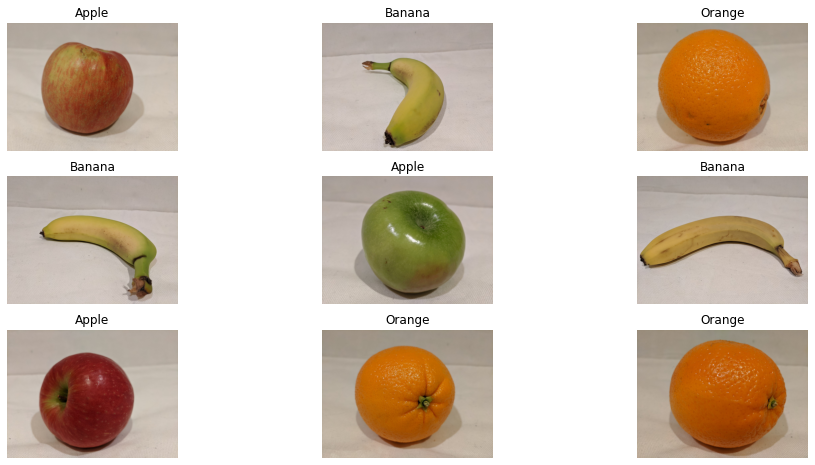

In [6]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Get the test images from the data/vision/test folder
test_folder = os.path.join('data', 'image-classification', 'test-fruit')
test_images = os.listdir(test_folder)

# Create an instance of the prediction service
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
custom_vision_client = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

# Create a figure to display the results
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes for each one
print('Classifying images in {} ...'.format(test_folder))
for i in range(len(test_images)):
    # Open the image, and use the custom vision model to classify it
    image_contents = open(os.path.join(test_folder, test_images[i]), "rb")
    classification = custom_vision_client.classify_image(project_id, model_name, image_contents.read())
    # The results include a prediction for each tag, in descending order of probability - get the first one
    prediction = classification.predictions[0].tag_name
    # Display the image with its predicted class
    img = Image.open(os.path.join(test_folder, test_images[i]))
    a=fig.add_subplot(len(test_images)/3, 3,i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(prediction)
plt.show()

Hopefully, your image classification model has correctly identified the groceries in the images.

## Learn more

The Custom Vision service offers more capabilities than we've explored in this exercise. For example, you can also use the Custom Vision service to create *object detection* models; which not only classify objects in images, but also identify *bounding boxes* that show the location of the object in the image.

To learn more about the Custom Vision cognitive service, view the [Custom Vision documentation](https://docs.microsoft.com/azure/cognitive-services/custom-vision-service/home)